In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

## look at the Data:
### there is no null values :)
### and no duplicated values :)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data[data.duplicated()].sum()

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [5]:
print('object columns:')
print(len(list(data.select_dtypes(include='object'))))
print('int columns:')
len(list(data.select_dtypes(include=['int64', 'float64'])))

object columns:
9
int columns:


8

In [6]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit price', ylabel='Density'>

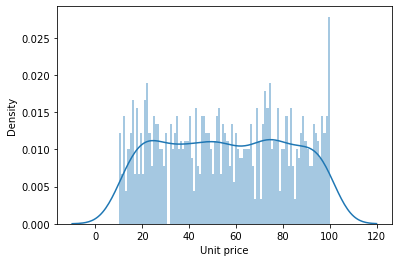

In [7]:
sns.distplot(data['Unit price'], bins=100)

In [8]:
print('This Is Uniform Distribution And Start At 10.8 And End Point At 89.88')
print(stats.uniform.fit(data['Unit price']))

This Is Uniform Distribution And Start At 10.8 And End Point At 89.88
(10.08, 89.88)


# KS_test:
## Is This Poisson Distribution ! OR Normal ? 
### Poisson suitable for repeated in specific peroid of time

C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


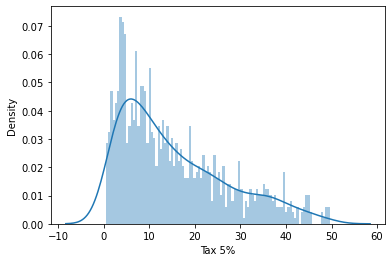

In [9]:
sns.distplot(data['Tax 5%'], bins=100);

In [10]:
stats.kstest(data['Tax 5%'], 'norm')

KstestResult(statistic=0.9266664673496166, pvalue=0.0)

In [11]:
ideal = stats.norm.rvs(size=len(data['Tax 5%']), loc=data['Tax 5%'].mean(), scale=data['Tax 5%'].std())

In [12]:
stats.kstest(data['Tax 5%'], ideal)

KstestResult(statistic=0.117, pvalue=2.214758736930358e-06)

(array([14., 16., 23., 18., 21., 23., 36., 35., 33., 14., 17., 21., 18.,
        30., 17., 24., 24., 23., 14., 27., 16., 15., 10., 17., 13., 18.,
        14., 17., 11., 15., 10., 14., 11., 13., 10.,  8.,  8., 17., 11.,
         8.,  9., 10.,  8., 12.,  9., 10.,  9.,  4., 12.,  8.,  9.,  5.,
        10.,  3.,  7.,  7.,  4.,  6.,  6., 11.,  6.,  1.,  4.,  3.,  6.,
         5.,  4.,  6.,  5.,  5.,  7.,  6.,  6.,  5.,  4.,  5.,  3.,  3.,
         3.,  9.,  2.,  3.,  4.,  2.,  1.,  3.,  0.,  2.,  3.,  5.,  5.,
         2.,  0.,  0.,  0.,  0.,  2.,  1.,  3.,  3.]),
 array([ 0.5085  ,  0.999915,  1.49133 ,  1.982745,  2.47416 ,  2.965575,
         3.45699 ,  3.948405,  4.43982 ,  4.931235,  5.42265 ,  5.914065,
         6.40548 ,  6.896895,  7.38831 ,  7.879725,  8.37114 ,  8.862555,
         9.35397 ,  9.845385, 10.3368  , 10.828215, 11.31963 , 11.811045,
        12.30246 , 12.793875, 13.28529 , 13.776705, 14.26812 , 14.759535,
        15.25095 , 15.742365, 16.23378 , 16.725195, 17.21661 , 1

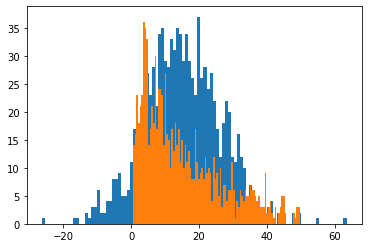

In [13]:
plt.hist(ideal, bins=100)
plt.hist(data['Tax 5%'], bins=100)

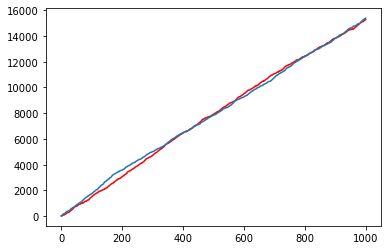

In [14]:
plt.plot(np.cumsum(ideal),  color='red')
plt.plot(np.cumsum(data['Tax 5%']))
# It's not From Same Distribution
# TIP: CDF Always Go Up 

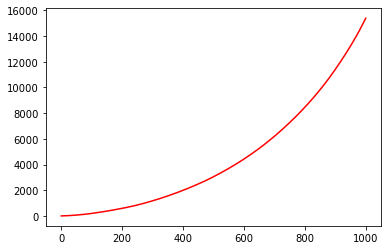

In [15]:
# This is our CDF Data
plt.plot(np.cumsum(data['Tax 5%'].sort_values().reset_index(drop=True)), color='red')

<AxesSubplot:ylabel='Frequency'>

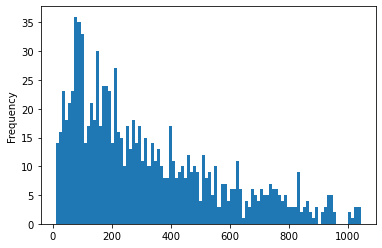

In [16]:
data['Total'].plot(kind='hist', bins=100)

In [17]:
stats.kstest(data['Tax 5%'], data['Total'])

KstestResult(statistic=0.933, pvalue=0.0)

## Another Formula For Compare two Distributon:
### 1) Kstest ========================================> See Code Above 
### 2) Kullback_leibler_divergence
### 3) jonson_shanon

## 2) Kullback_leibler_divergence:

In [18]:
count, devision = np.histogram(data['Total'], bins=100)

In [19]:
# Creat ideal Distribution With mean & std data['Total']
ideal = stats.norm.rvs(size=len(data['Total']), loc=data['Total'].mean(), scale=data['Total'].std())
icount, idevison = np.histogram(ideal, bins=100)

In [20]:
def kl(p, q):
    res = np.sum(np.where(np.logical_and(p != 0, q !=0 ), p * np.log(p / q), 0))
    return res

In [21]:
kl(count, icount)

<ipython-input-20-a26bb1900a88>:2: RuntimeWarning: divide by zero encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q !=0 ), p * np.log(p / q), 0))
<ipython-input-20-a26bb1900a88>:2: RuntimeWarning: invalid value encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q !=0 ), p * np.log(p / q), 0))
<ipython-input-20-a26bb1900a88>:2: RuntimeWarning: divide by zero encountered in log
  res = np.sum(np.where(np.logical_and(p != 0, q !=0 ), p * np.log(p / q), 0))
<ipython-input-20-a26bb1900a88>:2: RuntimeWarning: invalid value encountered in multiply
  res = np.sum(np.where(np.logical_and(p != 0, q !=0 ), p * np.log(p / q), 0))


512.5418200334552

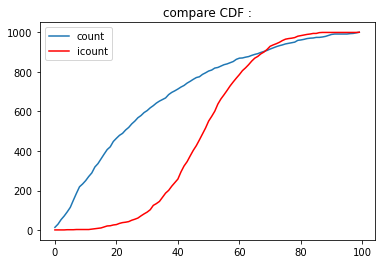

In [22]:
plt.title('compare CDF :')
plt.plot(np.cumsum(count))
plt.plot(np.cumsum(icount), color='red')
plt.legend(['count','icount'])

## 3) jonson_shanon:

In [23]:
from numpy.linalg import norm
def js(p,q):
    p1 = p / norm(p, ord=1)
    q1 = q / norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    r = 0.5 * (stats.entropy(p1, m) + stats.entropy(q1, m))
    return r

In [24]:
js(count, icount)

0.22853552342408462

In [25]:
data['day'] = data['Date'].apply(lambda x: x.split('/')[1])
data['month'] = data['Date'].apply(lambda x: x.split('/')[0])
data['year'] = data['Date'].apply(lambda x: x.split('/')[2])
data.drop(['Date', 'gross margin percentage'], axis=1, inplace=True)

In [28]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,15:33,Cash,65.82,3.2910,4.1,22,2,2019


In [34]:
data['day'] = data['day'].astype('int')
data['month'] = data['month'].astype('int')
data['year'] = data['year'].astype('int')

<AxesSubplot:ylabel='Frequency'>

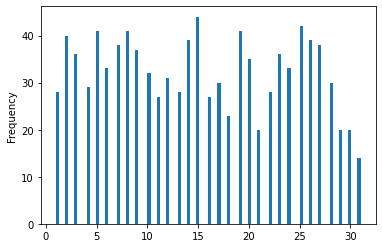

In [36]:
data['day'].plot(kind='hist', bins=100)

C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

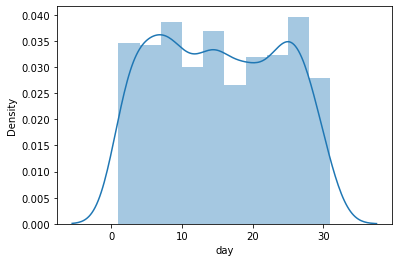

In [51]:
sns.distplot(data['day'])

C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

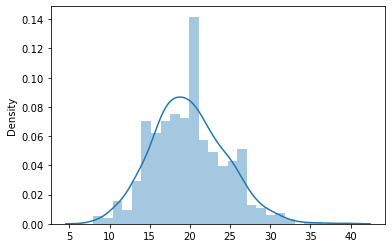

In [53]:
sns.distplot(np.random.poisson(lam=20, size=1000))

<AxesSubplot:ylabel='Frequency'>

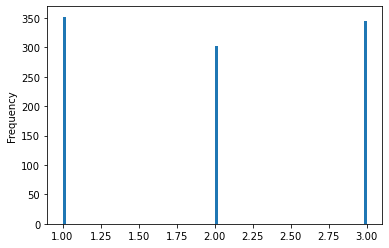

In [61]:
data['month'].plot(kind='hist', bins=100)
# 3 month 

In [74]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
res = ols('Total ~ month', data=data).fit()

In [75]:
sm.stats.anova_lm(res)

,df,sum_sq,mean_sq,F,PR(>F)
month,1.0,3.003950e+04,30039.498084,0.496602,0.481161
Residual,998.0,6.036910e+07,60490.079080,NaN,NaN


In [79]:
data['hour'] = data['Time'].apply(lambda x: x.split(':')[0])

In [85]:
data['hour'] = data['hour'].astype('int')

In [86]:
data.groupby('hour')['Total'].size()

hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Total, dtype: int64

In [89]:
dataA = data[data['hour'] <= 15]['Total']
dataB = data[data['hour'] >= 15]['Total']

In [92]:
ma = dataA.mean()
mb = dataB.mean()

In [93]:
sa = dataA.std()
sb = dataB.std()

In [94]:
la = len(dataA)
lb = len(dataB)

In [95]:
from numpy import sqrt, abs, round
from scipy.stats import norm
below = sqrt((sa ** 2 / la) + (sb ** 2 / lb))
above = ma - mb
z = above / below
p_value = 2 * (1 - norm.cdf(abs(z)))

In [96]:
p_value

0.6128966576380295

<AxesSubplot:xlabel='hour,month'>

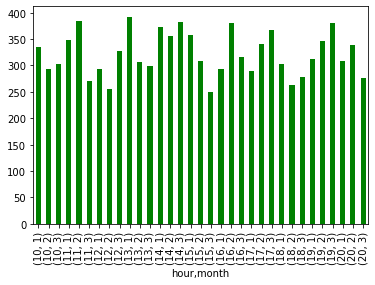

In [106]:
data.groupby(['hour', 'month'])['Total'].mean().plot(kind='bar', color='green')

<AxesSubplot:ylabel='Total'>

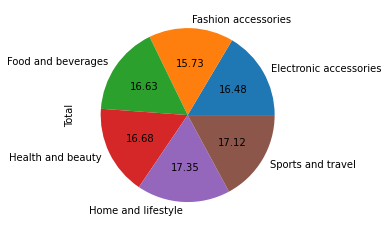

In [112]:
data.groupby(['Product line'])['Total'].mean().plot(kind='pie', autopct='%2.2f')

<AxesSubplot:ylabel='Product line,Gender'>

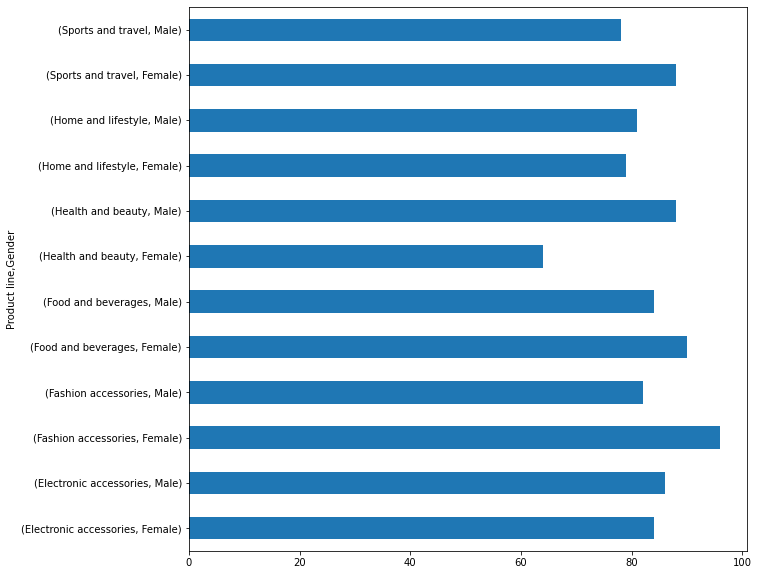

In [121]:
data.groupby(['Product line', 'Gender'])['Total'].size().plot(kind='barh', figsize=(10, 10))

In [127]:
data.groupby(['Product line'])['Tax 5%'].mean()

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: Tax 5%, dtype: float64

In [130]:
data.groupby(['City', 'Product line'])['Total'].size()

City       Product line          
Mandalay   Electronic accessories    55
           Fashion accessories       62
           Food and beverages        50
           Health and beauty         53
           Home and lifestyle        50
           Sports and travel         62
Naypyitaw  Electronic accessories    55
           Fashion accessories       65
           Food and beverages        66
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Electronic accessories    60
           Fashion accessories       51
           Food and beverages        58
           Health and beauty         47
           Home and lifestyle        65
           Sports and travel         59
Name: Total, dtype: int64